# IRIS FLOWER CLASSIFICATION

#  Import modules

In [315]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading the dataset


In [316]:
df = pd.read_csv("IRIS.csv")

In [317]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [318]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [320]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#  Preprocessing the dataset

In [321]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#  Exploratory Data Analysis

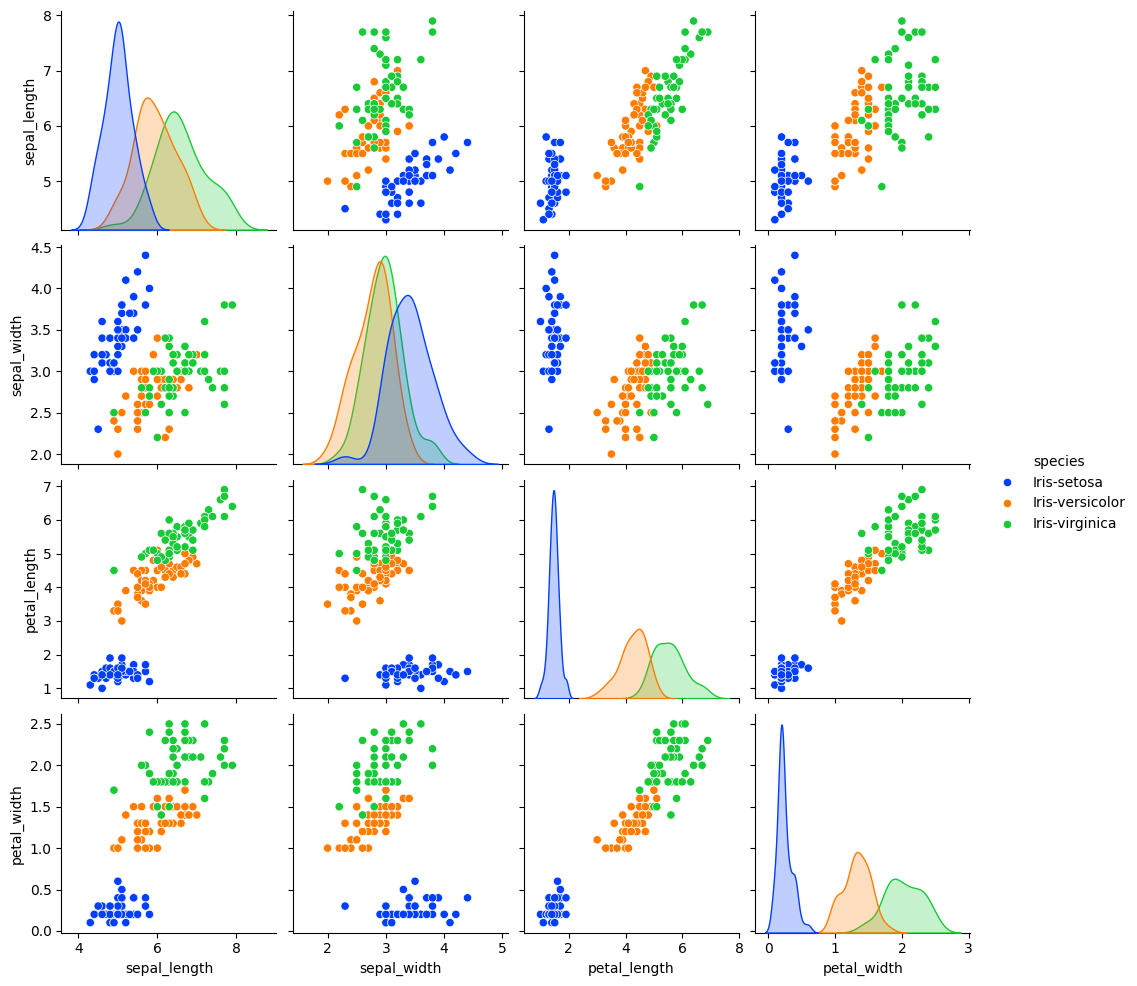

In [322]:
sns.pairplot(data=df,hue = 'species', palette = 'bright')

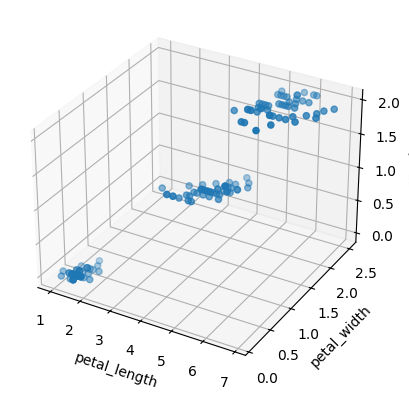

In [323]:
df['species'],categories = pd.factorize(df['species'])
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(df.petal_length, df.petal_width, df.species)
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('species')
plt.show()

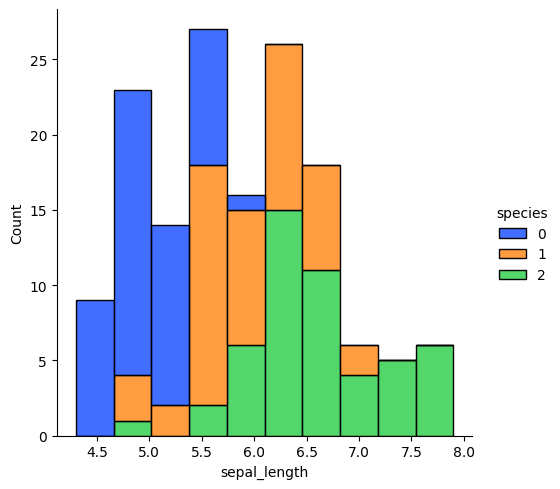

In [324]:
sns.displot(x ='sepal_length', bins = 10, hue = 'species', data = df, palette = 'bright' , multiple = 'stack')

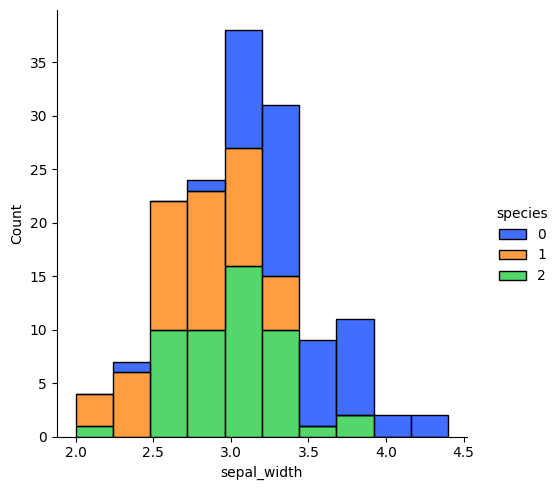

In [325]:
sns.displot(x = 'sepal_width', bins = 10, hue = 'species', data = df, palette = 'bright' , multiple = 'stack' )

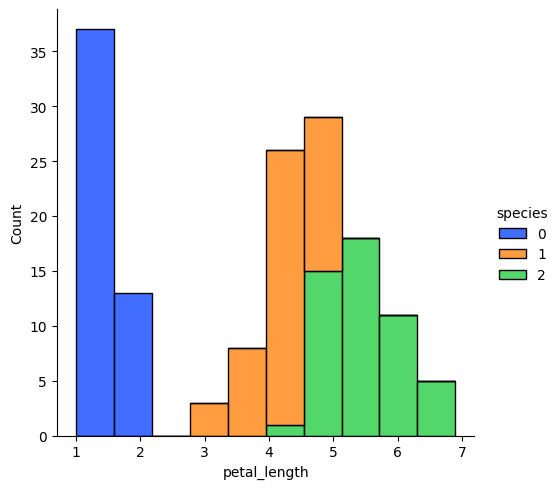

In [326]:
sns.displot(x = 'petal_length' , bins = 10, hue = 'species', data = df, palette = 'bright' , multiple = 'stack')

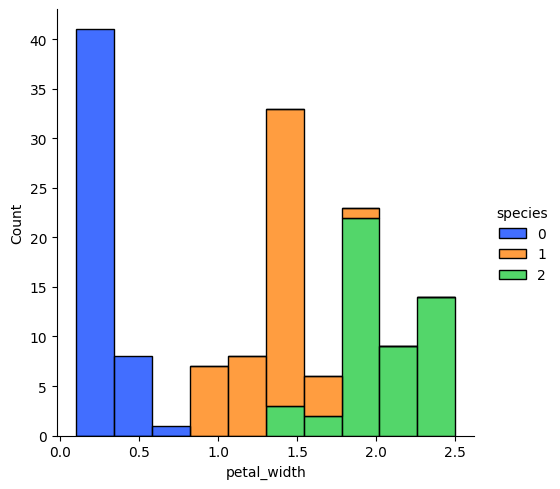

In [327]:
sns.displot(x = 'petal_width' , bins = 10, hue = 'species', data = df, palette = 'bright' , multiple = 'stack')


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

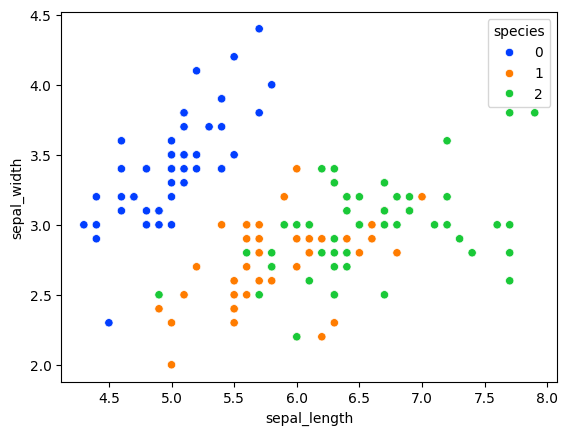

In [328]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue = 'species' , palette = 'bright')

<Axes: xlabel='petal_length', ylabel='petal_width'>

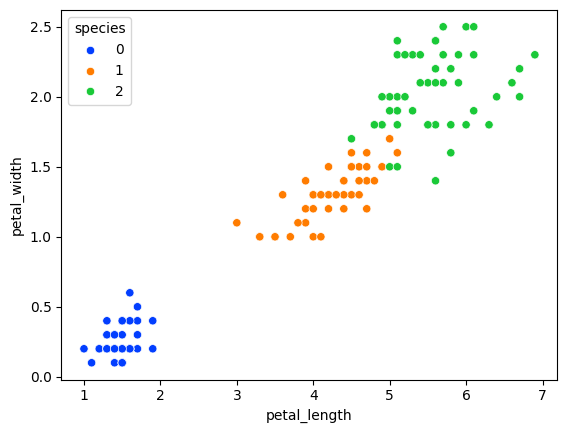

In [329]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue = 'species' , palette = 'bright')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

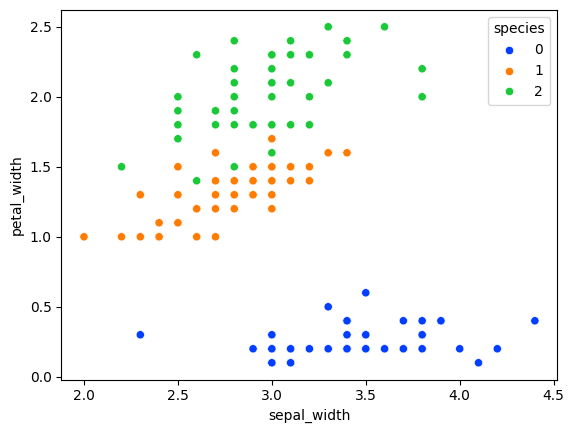

In [330]:
sns.scatterplot(data=df, x="sepal_width", y="petal_width", hue = 'species' , palette = 'bright')

# Coorelation Matrix

<Axes: >

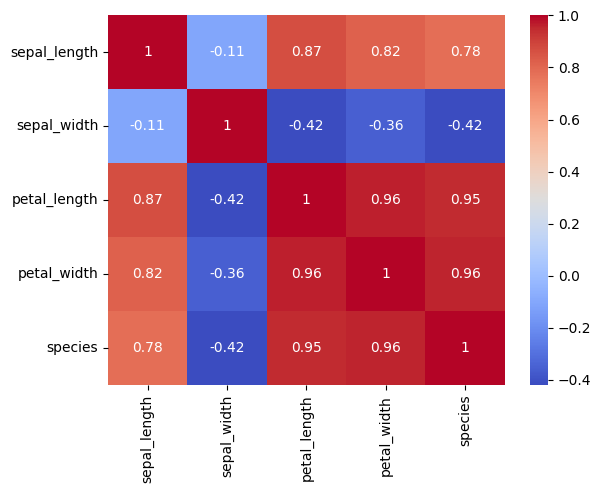

In [331]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Label Encoder

In [332]:
le = LabelEncoder()

In [333]:
df ['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [334]:
X = df.drop(columns = ['species'])

In [335]:
Y = df['species']

In [336]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

# MODEL 1 : Logistic Regression

In [337]:
lr = LogisticRegression()

In [338]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [339]:
prediction1 = lr.predict(X_test)

In [340]:
accuracy_score(Y_test,prediction1)

0.9333333333333333

# MODEL 2: Support Vector Machine Algorithm

In [341]:
svc = SVC()

In [342]:
svc.fit(X_train, Y_train)

SVC()

In [343]:
prediction2 = svc.predict(X_test)

In [344]:
accuracy_score(Y_test,prediction1)

0.9333333333333333

# MODEL 3: DecisionTreeClassifier

In [345]:
dtc = DecisionTreeClassifier()

In [346]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [347]:
prediction3 = dtc.predict(X_test)

In [348]:
accuracy_score (Y_test,prediction3)

0.9111111111111111

# A detailed classification report of model 2

In [349]:
classification_report(Y_test,prediction2)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       0.80      0.92      0.86        13\n           2       0.94      0.85      0.89        20\n\n    accuracy                           0.91        45\n   macro avg       0.91      0.92      0.92        45\nweighted avg       0.92      0.91      0.91        45\n'

In [350]:
confusion_matrix(Y_test,prediction2)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 17]])

Text(50.722222222222214, 0.5, 'Actual')

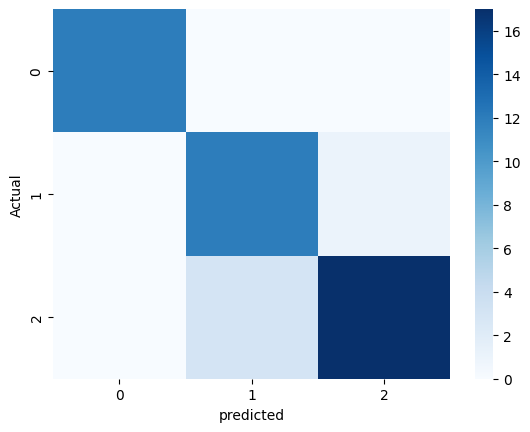

In [351]:
sns.heatmap(confusion_matrix(Y_test,prediction2),cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')

# prediction from input

In [352]:
X_new = np.array ([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
prediction = lr.predict(X_new)
print('prediction of species:{}'.format(prediction))

prediction of species:[0 1 2]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
